In [1]:
from prerequisites import *

# Chapter 4 Fractals
***

## Chapter 4.1 Cantor sets
***

**tl;dr**: Constructing a Cantor set, countability stuff. Not much interesting stuff.

## Chapter 4.2 Probabilistic Constructions of Fractals
***

### Iterated functions system
*Tldr*: Fractals afte often self similar in the sense that we can find a set of functions that map the fractals to parts of itself, and the image of the fractal under all of the functions is the fractal itself.  
**Def**: An **iterated functions system**, abbreviated IFS, is a set of maps $\{\mathbf{f}_1, \mathbf{f}_2, \ldots, \mathbf{f}_n\}$ on $\mathbb{R}^m$. In addition, in this course we require that there also be positive real numbers $p_1, p_2, \ldots, p_n$ that add up to one (defined as "transition probabilities"). A non empty compact set $S\subseteq \mathbb{R}^m$ is the **attractor** of the IFS if
$$S = \bigcup_{i=1}^n f_i(S)$$

*Remarks*: Under some decently lax conditions on $f_i$ (for example if all of them are contractions), we know that the attractor exists and is unique among all non-empty compact sets.  
A result in Egodic theory then tells us that if $S$ is the attractor and we start with an arbitrary point $x_0\in S$ and randomly apply one of the functions to it (say following the probability distribution $\{p_1, p_2, \ldots, p_n\}$), then the resulting orbit will be dense in $S$ (there are also come conditions on the $f_i$ for this to hold, but I dont know them).  
Therefore a way of generating the attractor is to pick a random point and generate a large number of iterates of it by applying a random function from the IFS and then removing some of the initial points.

### Computer experiment 3.1
> The experiments in this chapter require the ability to plot graphics on a
computer screen or printer. Define an iterated function system by
$$f_1(x, y)= \left(\frac{x}{2}, \frac{y}{2}\right), f_2\left(x, y\right)=\left(\frac{1 + x}{2}, \frac{y}{2}\right), f_3(x, y)= \left(\frac{x}{2}, \frac{1 + y}{2}\right)$$
with probabilities $p_1 =p_2 =p_3 =\frac{1}{3}$. Begin with any point in the unit square
$[0, 1]\times[0, 1]$ and use a random number generator or three-headed coin to generate an orbit. Plot the attractor of the iterated function system. 

To this end we implement a general purpose chaos game player

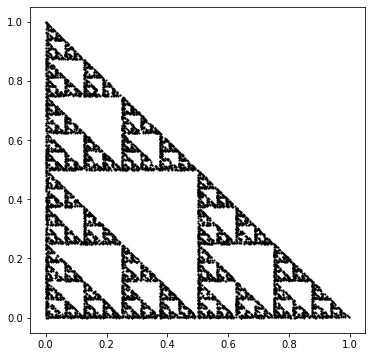

In [2]:
def f_1(x):
    return x/2
def f_2(x):
    return x/2 + np.array([0.5, 0])
def f_3(x):
    return x/2 + np.array([0, 0.5])
gamma = chaos_game(np.array([0.1,0.1]), [f_1, f_2, f_3], None, 10000, 100)
x, y = zip(*gamma)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(x, y, s = 1, c="k");

### Exercise T4.3
> (a) Find the maps $f_1$, $f_2$, $f_3$ to express the Sierpinski gasket as an iterated function
system. Assume that the triangle is equilateral with side-length one.   
> (b) Find the exponential convergence rate of an orbit to the attractor. That is, if
$x_0$ is a point in $[0,1]\times[0,1]$, find an upper
limit for the distance from the point $x_k$ of the orbit of the iterated function
system to the Sierpinski gasket.

(a) We note that really the only change we need to make from the Computer exercise 4.1 is to move the top triangle differently, about $1/4$ to the side and not as far up (so that it would be an equilateral triangle). So we only need to ammend $f_3$ to be $f_3(x,y) = \left(\frac{x+\frac{1}{2}}{2}, \frac{y+\frac{\sqrt{3}}{2}}{2}\right)$, i.e. we scale the triangle by half and then move it to where the top triangle should be.  
(b) We note that $|f_i(x)-f_i(y)|\leq \frac{1}{2}|x-y|$ for all $x,y\in[0,1]\times[0,1]$ and all $i\in\{1,2,3\}$, so if $F$ is the attractor, then $f_i(F) = F$ for all $i$ and so $\min_{y\in F}|f_i(x)-f_i(y)| \leq \frac{1}{2}\min_{y\in F} |x-y|$, therefore 
$$\min_{y\in F}|x_k-y|\leq \frac{1}{2}\min_{y\in F}|x_{k-1}-y|\leq\ldots \leq \left(\frac{1}{2}\right)^k\min_{y\in F}|x_0-y|$$ 
So $\frac{1}{2}$ is the exponential convergence rate.

### Exercise T4.4
> Repeat Exercise T4.3 using the Sierpinski carpet instead of the gasket. Find
four maps and the exponential convergence rate.

(a) $f_1(x,y) = \left(\frac{x}{3}, \frac{y}{3}\right)$, $f_2(x,y) = \left(\frac{x+2}{3}, \frac{y}{3}\right)$, $f_3(x,y) = \left(\frac{x+2}{3}, \frac{y+2}{3}\right)$, $f_4(x,y) = \left(\frac{x}{3}, \frac{y+2}{3}\right)$.  
(b) We note that $|f_i(x)-f_i(y)|\leq \frac{1}{2}|x-y|$ for all $x,y\in[0,1]\times[0,1]$ and all $i\in\{1,2,3,4\}$. So by the same logic as before, the rate is $\frac{1}{3}$.

### Computer experiment 4.2
> Plot the Sierpinski gasket and carpet in the plane using the iterated function
systems developed in Exercises 4.3 and 4.4

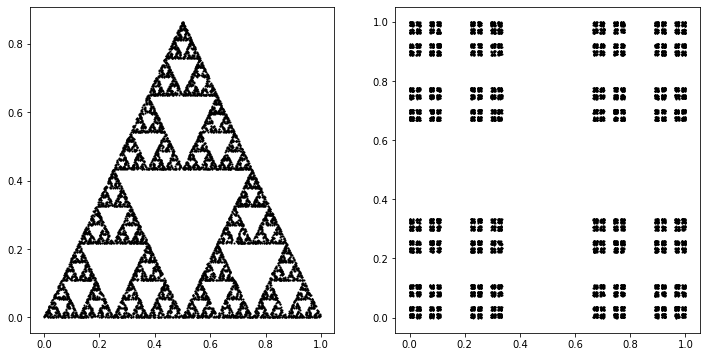

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

def f_1(x):
    return x/2
def f_2(x):
    return x/2 + np.array([0.5, 0])
def f_3(x):
    return x/2 + np.array([0.25, 0.25*(3**.5)])
gamma = chaos_game(np.array([0.1,0.1]), [f_1, f_2, f_3], None, 10000, 100)
x, y = zip(*gamma)
axs[0].scatter(x, y, s = 1, c="k");

def f_1(x):
    return x/3
def f_2(x):
    return x/3 + np.array([2/3, 0])
def f_3(x):
    return x/3 + np.array([2/3, 2/3])
def f_4(x):
    return x/3 + np.array([0, 2/3])
gamma = chaos_game(np.array([0.1,0.1]), [f_1, f_2, f_3, f_4], None, 10000, 100)
x, y = zip(*gamma)
axs[1].scatter(x, y, s = 1, c="k");

## Chapter 4.3 Fractals from Deterministic Systems
***

### Exercise T4.5
>For the tent map, define the set $L$ of all points $x \in [0, 1]$ such that $f^n(x) < 0$
for some $n$.   
(a) Prove that if $f^n(x) < 0$, then $f^k(x) < 0$ for all $k>n$.   
(b) Provethat for any $a > 2$, the length of $L$ is $1$ (the complement of $L$ has measure
zero).   
(c) Prove that for $0 \leq a \leq 2$, $L=\emptyset$, the empty set.

(a) Note that if $f^n(x) <0 < \frac{1}{2}$ so $f\left(f^n(x)\right) = af^n(x) < f^n(x)$ as $a>0$. Therefore $f^{n+1}(x)<0$ as well and the full result proceeds by induction.  
(b) Consider what happens to $[0,1]$: All values in $\left(\frac{1}{a}, 1-\frac{1}{a}\right)$ get mapped to $(1, \infty)$ and then from there to $(-\infty, 0)$, so all the points in $\left(\frac{1}{a}, 1-\frac{1}{a}\right)$ eventually map out. On the other hand, the remaining intervals $[0, \frac{1}{a}]$ and $[1-\frac{1}{a}, 1]$ each map to $[0,1]$ and the cycle happens anew. So in some sense on each iteration we love $\frac{2}{a}$ of the total length of the remaining points which have not yet left $[0,1]$. So we get that the length of the remaining points after $n$ iterations is $\left(\frac{2}{a}\right)^n\rightarrow 0$ as $n\rightarrow \infty$. So the length of the complement is $0$.  
(c) We can see that for these parameter values, $[0,1]$ gets mapped back to a subset of $[0,1]$.

### Exercise T4.6
>Show that $B$, the basin of infinity of $T_3$ is the complement in $\mathbb{R}$ of the
middle-third Cantor set $C$.

This is immediate by the previous discussion, all points which have a $1$ in their ternary expansion in any position map to outside, and this is exactly the complement. 

## Chapter 4.4 Fractal Basin Boundaries
***

### Computer experiment 3.1
>Draw the Julia set for $f(z)=z^2 +c$ with $c= 0.29 + 0.54i$. Plot the basin
of infinity in black. Divide the square $[-1.3, 1.3]\times[-1.3, 1.3]$ into an $N\times N$
grid for $N=100$. For each of the $N^2$ small boxes, iterate $f(z)$ using the center
of the box as initial value. Plot a black point at the box (or better, fill in the
box) if the iteration diverges to infinity; plot a different color if the iteration stays
bounded. Your picture should bear some resemblance to the examples in Figure
4.11.   
What is the bounded attracting periodic sink for this Julia set? Locate $c$ in
the Mandelbrot set. Increase $N$ for better resolution.   
Further work: Can you find
a constant $c$ such that $f(z)=z^2+c$ has a period-six sink?

The plot is available below. We implement exactly what was said.  
We know that at least one of the ciritical points of $f$ is attracted by any attractor. Therefore as $0$ is the unique critival point of $f$, we see by iteration that $\{0.009-0.041i, 0.288+0.539i, 0.082+0.851i, -0.427+0.680i\}$ is the period $4$ attractor.

(12, [array([0.02084168, 0.53146293]), array([0.00521042, 0.55751503]), array([-0.02084168,  0.54188377]), array([-0.00521042,  0.51583166])])
(22, [array([-0.01042084,  0.52104208]), array([0.01563126, 0.52625251]), array([0.01042084, 0.55230461]), array([-0.01563126,  0.54709419])])
(22, [array([0.        , 0.55751503]), array([-0.02084168,  0.53667335]), array([0.        , 0.51583166]), array([0.02084168, 0.53667335])])
(22, [array([0.00521042, 0.53146293]), array([0.00521042, 0.54188377]), array([-0.00521042,  0.54188377]), array([-0.00521042,  0.53146293])])
(44271, [array([0.28657315, 0.53667335]), array([0.08336673, 0.84408818]), array([-0.41683367,  0.67735471]), array([ 0.       , -0.0260521])])
(42337, [array([-0.42740034,  0.68030915]), array([ 0.00980499, -0.04145939]), array([0.28837841, 0.5391855 ]), array([0.08243663, 0.85097961])])


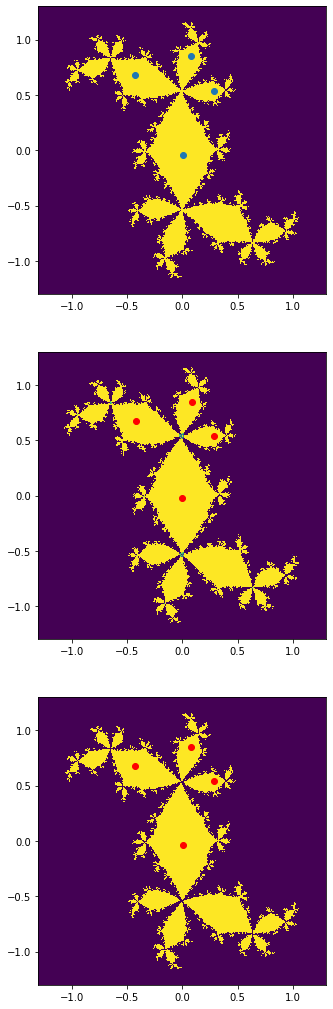

In [4]:
def julia(p, c):
    x, y = p
    a, b = c
    return np.array([x*x-y*y+a, 2*x*y+b])

c = (0.29,0.54)
l = np.array([-1.3,-1.3])
r = np.array([1.3,1.3])
M = 500
N = 50

fig, axs = plt.subplots(3, 1, figsize=(6, 18))

color = np.array(basin_of_attraction([], julia, c, l, r, 2, N, M))
axs[0].imshow(color, origin = "lower",  extent=[l[0], r[0], l[1],r[1]]);
gamma = orbit_of_map(np.array([0,0]), julia, c, 500)
attractor = gamma[-4:]
x, y = zip(*attractor)
axs[0].scatter(x, y);

color, attractors, freq = basins_of_attraction(julia, c, l, r, 2, M)
print(*zip(freq[-5:], attractors[-5:]), sep = "\n")
axs[1].imshow(color, origin = "lower",  extent=[l[0], r[0], l[1],r[1]]);
x, y = zip(*attractors[-1])
axs[1].scatter(x, y, c="r");

color, attractors, freq = basins_of_attraction2(julia, c, l, r, 2, N, M)
print(*zip(freq[-5:], attractors[-5:]), sep = "\n")
axs[2].imshow(color, origin = "lower",  extent=[l[0], r[0], l[1],r[1]]);
x, y = zip(*attractors[-1])
axs[2].scatter(x, y, c="r");

### Exercise T4.7
> Show that the one-dimensional map $g(x)=x^2 - x - \frac{3}{4}a^2$ is conjugate to
the map $h(w) = w^2 - c$, where the constant$ c = \frac{3}{4}(1+a^2)$.

Let $f(x) = x+\frac{1}{2}$, then 
$$g(f(x)) = x^2+x+\frac{1}{4}-x-\frac{1}{2}- \frac{3}{4}a^2 = x^2+\frac{1}{2}-\frac{3}{4}(1+a^2) = f(h(x))$$
So they are indeed conjugate.

### Example 4.13
> Consider the map $f(x,y) = \left(x^2-y^2-x-ay,2xy-ax+y\right)$ for $a=1.0287137\ldots$, it has three attractors and all three of them them habe basins of attraction with empty interior. This is an example of a **riddled basin**, i.e. any neighbourhood contains a points of different basins of attraction.

In [ ]:
def f(p, a):
    x, y = p
    return np.array([x*x-y*y-x-a*y, 2*x*y-a*x+y])

a = 1.0287137
l = np.array([-2.5,-2.5])
r = np.array([2.5,2.5])
M = 1000
N = 50


fig, axs = plt.subplots(2, 2, figsize=(24, 24))

color = np.array(basin_of_attraction([], f, a, l, r, 2, 50, M))
axs[0,0].imshow(color, origin = "lower",  extent=[l[0], r[0], l[1],r[1]]);
gamma = orbit_of_map(np.array([0.1,0.1]), f, a, 100)
attractor = gamma[-10:]
x, y = zip(*attractor)
axs[0,0].scatter(x, y);

color, attractors, freq = basins_of_attraction(f, a, l, r, 2, M)
print(*freq, sep = "\n")
axs[0,1].imshow(color, origin = "lower",  extent=[l[0], r[0], l[1],r[1]]);
x, y = zip(*attractors[-1])
axs[0,1].scatter(x, y, c="r");
x, y = zip(*attractors[-2])
axs[0,1].scatter(x, y, c="g");
x, y = zip(*attractors[-3])
axs[0,1].scatter(x, y, c="b");

color, attractors, freq = basins_of_attraction2(f, a, l, r, 2, 50, M)
print(*freq, sep = "\n")
axs[1,0].imshow(color, origin = "lower",  extent=[l[0], r[0], l[1],r[1]]);
x, y = zip(*attractors[-1])
axs[1,0].scatter(x, y, c="r");
x, y = zip(*attractors[-2])
axs[1,0].scatter(x, y, c="g");
x, y = zip(*attractors[-3])
axs[1,0].scatter(x, y, c="b");

## Chapter 4.5 Fractal dimension
***

### Box-counting dimension
*Tl;dr*: Count how many boxes have a point of the fractal, take logs and figure out the slope of this line near the origin.  
**Def**: Let $S\subseteq \mathbb{R}^n$ be bounded. Let $N(\epsilon)$ be the number of an $\epsilon$-mesh hypercubes that contain a point of $S$. Then we define the box dimension
$$\textrm{boxdim}(S) = \lim_{\epsilon\rightarrow 0}\frac{N(\epsilon)}{-\ln(\epsilon)}$$
Whenever this limit exists.

### Exercise T4.8
> Show that the box-counting dimension of a disk (a circle together with its
interior) is 2.

Note that clearly the dimension of a disk cannot exceed $2$ since it is a subset of $\mathbb{R}^2$, furthermore a disk contains a square and a square tivially had bod dimension $2$. Therefore the disk must also have box dimension $2$.

## Chapter 4.6 Computing the Box-Counting dimension
***

### Exercise T4.9
> Find the box-counting dimension of the invariant set of the skinny baker
map of Example 4.5.

Recall that this invariant set is $C\times[0,1]$ where $C$ is the middle third Cantor set. **TODO**